In [32]:
!p3_env/bin/pip install sklearn

    100% |████████████████████████████████| 6.7MB 60kB/s eta 0:00:01    40% |█████████████                   | 2.7MB 6.5MB/s eta 0:00:01
    100% |████████████████████████████████| 286kB 56kB/s eta 0:00:01
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /home/ataleckij/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [1]:
import scipy.io.wavfile as wav

In [2]:
rate, signal = wav.read('./data/OAF_dab_happy.wav')

In [21]:
wav.read??

In [24]:
rate, signal.shape, signal 

(24414, (46152,), array([ 0,  0, -1, ...,  3,  3, -2], dtype=int16))

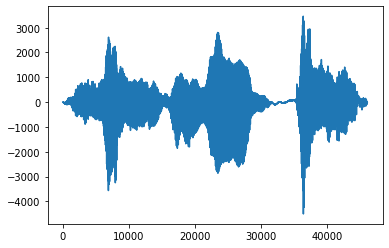

In [125]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(signal.shape[0])
plt.plot(x, signal)

In [30]:
signal_mean, signal_std = signal.mean(), signal.std()
signal_mean, signal_std

(2.172430230542555, 648.5939964666352)

In [36]:
standart_signal = (signal.copy() - signal_mean) / signal_std
standart_signal.mean(), standart_signal.std()

(-2.155399181106215e-18, 1.0)

In [45]:
standart_signal_reshaped = standart_signal.copy().reshape((standart_signal.shape[0], 1))
standart_signal_reshaped

array([[-0.00334945],
       [-0.00334945],
       [-0.00489124],
       ...,
       [ 0.00127594],
       [ 0.00127594],
       [-0.00643304]])

In [73]:
import os
from keras.preprocessing.sequence import pad_sequences

def _get_end_of(file_name):
    return file_name.split('_')[-1].split('.')[0]

def read_data():
    labels_to_classes = {'happy': 0, 'sad': 1, 'angry': 2}
    signals, classes = [], []
    maxlen = -np.inf
    for file_name in os.listdir('data/'):
        label = _get_end_of(file_name)
        if label in labels_to_classes.keys():
            try:
                rate, signal = wav.read('data/' + file_name)
            except:
                print(file_name)
            maxlen = max(maxlen, len(signal))
            class_ = labels_to_classes[label]
            signals.append(signal), classes.append(class_)
    return pad_sequences(signals, maxlen=maxlen), np.array(classes), maxlen

In [76]:
signals, classes, maxlen = read_data()
signals.shape

OAF_merge_angry.wav
YAF_team_sad.wav


(600, 65679)

In [81]:
np.unique(classes)

array([0, 1, 2])

In [82]:
signals_reshaped = signals.copy().reshape((signals.shape[0], signals.shape[1], 1))
signals_reshaped.shape

(600, 65679, 1)

In [102]:
from sklearn.model_selection import train_test_split

(signals_reshaped_train, signals_reshaped_test,
 classes_train, classes_test) = train_test_split(signals_reshaped, classes, test_size=0.33, 
                                                 random_state=42, stratify=classes)

# (signals_reshaped_work, signals_reshaped_val,
#  classes_word, classes_val) = train_test_split(signals_reshaped_train, classes_train, test_size=0.2, 
#                                                random_state=42, stratify=classes_train)

In [109]:
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, GRU, Flatten, Dense, AveragePooling1D, Dropout

model = Sequential()
model.add(AveragePooling1D(128, input_shape = (None, 1)))
# model.add(GRU(1))
# model.add(GRU(32, return_sequences=True, input_shape = (None, 1)))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
# model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling1d_13 (Averag (None, None, 1)           0         
_________________________________________________________________
gru_46 (GRU)                 (None, None, 64)          12672     
_________________________________________________________________
gru_47 (GRU)                 (None, None, 32)          9312      
_________________________________________________________________
gru_48 (GRU)                 (None, 32)                6240      
_________________________________________________________________
dense_32 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_33 (Dense)             (None, 3)                 771       
Total params: 37,443
Trainable params: 37,443
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [111]:
history = model.fit(signals_reshaped_train, classes_train, 
                    epochs=10, batch_size=1, validation_split=0.2)
#                     validation_data=(signals_reshaped_val, classes_val)) 

Train on 321 samples, validate on 81 samples
Epoch 1/10
321/321 [==============================] - 211s 658ms/step - loss: 1.0895 - acc: 0.4112 - val_loss: 1.0166 - val_acc: 0.4198
Epoch 2/10
321/321 [==============================] - 203s 634ms/step - loss: 0.9545 - acc: 0.5327 - val_loss: 0.7932 - val_acc: 0.6173
Epoch 3/10
321/321 [==============================] - 204s 635ms/step - loss: 0.7463 - acc: 0.6449 - val_loss: 0.7356 - val_acc: 0.6049
Epoch 4/10
321/321 [==============================] - 204s 635ms/step - loss: 0.6270 - acc: 0.7103 - val_loss: 0.5051 - val_acc: 0.7531
Epoch 5/10
321/321 [==============================] - 203s 634ms/step - loss: 0.5101 - acc: 0.7788 - val_loss: 0.3683 - val_acc: 0.8519
Epoch 6/10
321/321 [==============================] - 204s 635ms/step - loss: 0.3704 - acc: 0.8505 - val_loss: 0.2479 - val_acc: 0.8889
Epoch 7/10
321/321 [==============================] - 203s 634ms/step - loss: 0.3852 - acc: 0.8598 - val_loss: 0.4820 - val_acc: 0.8395
Epo

In [116]:
# sum((model.predict(signals_reshaped_test) >= 0.5).T[0].astype(int) == classes_test) / len(classes_test)
(model.predict_classes(signals_reshaped_test) == classes_test).sum() / len(classes_test)

0.9090909090909091

In [126]:
'90.91%'

'90.91%'

10 10


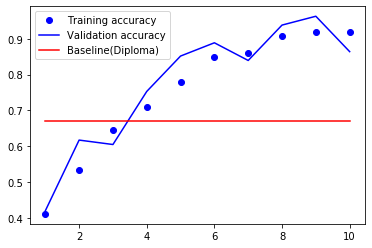

In [124]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = np.arange(1, len(acc) + 1)
base_line = np.array((len(acc))*[0.67])
print(len(base_line), len(epochs))

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.plot(epochs, base_line, 'r', label='Baseline(Diploma)')

plt.legend()

plt.show()